# Udacity Machine Learning Nanodegree Capstone Project

## Recurrent Neural Network based language model.

### Naren Doraiswamy

#### August 2017


The traditional neural networks have given some great results after the evolution of the kind of computational efficiency that is available today and the huge amounts of data that can be processed with this computational power. These traditional networks just take in the inputs without assuming any dependencies between them and this might be a problem when we are working on problems like natural language processing , speech/audio processing and also in vision problems where adjacent pixels are almost the same.


In this particular capstone project ,i will be working on the language processing problem where i will train a network on a particular kind of text and then try to generate similar kind of text from the model.


In this particular capstone project ,i will be working on the language processing problem where i will train a network on a particular kind of text and then try to generate similar kind of text from the model.


The papers that i have referred are given below:

[Language Model based on Recurrent Neural Network](http://www.fit.vutbr.cz/research/groups/speech/publi/2010/mikolov_interspeech2010_IS100722.pdf)

[Extensions of recurrent neural network language model](http://www.fit.vutbr.cz/research/groups/speech/publi/2011/mikolov_icassp2011_5528.pdf)

[Generating Text with Recurrent Neural Networks](http://machinelearning.wustl.edu/mlpapers/paper_files/ICML2011Sutskever_524.pdf)


Language Modeling using LSTM.
Our goal is to build a Language Model using a Recurrent Neural Network. Let's say we have sentence of n words. Language Model allows us to predict the probability of observing the sentence (in a given dataset) as: P(w1,...,wn)=∏i=1nP(wi∣w1,...,wi−1)P(w1,...,wn)=∏i=1nP(wi∣w1,...,wi−1) In words, the probability of a sentence is the product of probabilities of each word given the words that came before it. So, the probability of the sentence "He went to buy some chocolate" would be the probability of "chocolate" given "He went to buy some", multiplied by the probability of "some" given "He went to buy", and so on. Why is that useful? Why would we want to assign a probability to observing a sentence? First, such a model can be used as a scoring mechanism. For example, a Machine Translation system typically generates multiple candidates for an input sentence. You could use a language model to pick the most probable sentence. Intuitively, the most probable sentence is likely to be grammatically correct. Similar scoring happens in speech recognition systems. But solving the Language Modeling problem also has a cool side effect. Because we can predict the probability of a word given the preceding words, we are able to generate new text. It's a generative model. Given an existing sequence of words we sample a next word from the predicted probabilities, and repeat the process until we have a full sentence. And this is exactly what we are going to do i.e: Generate new text


We will be using a special case of RNN's called LSTM since vanilla RNN's cannot hold on to the memory for a long time and suffers from Vanishing and Exploding gradient problem. Its just a simple manipulation of vanilla RNN and there are many different variants in Rnn's , the other famous one being gated recurrent units GRU
So lets get started with the implementation

In [3]:
import numpy as np
import tensorflow as tf
import time
import sys
import matplotlib
%matplotlib inline

In [4]:
# Open data file and convert to lowercase
filename = 'fictionnovel.txt'
text =  open(filename).read().lower()

print('text length:', len(text))

# create and sort a list of unique characters
chars = sorted(list(set(text)))
nb_chars = len(chars)
print('number of unique chars:', len(chars))

text length: 517631
number of unique chars: 49


In [5]:
print (chars)

['\n', ' ', '!', '(', ')', '*', ',', '-', '.', '1', '2', '3', ':', ';', '?', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '‘', '’', '“', '”', '\ufeff']


### Data Exploration

The dataset was picked from the __project gutenberg__ website which provides free ebooks for downloads for text data [here](http://www.gutenberg.org/ebooks/2591?msg=welcome_stranger)

In [6]:
view_sentence_range = (0, 10)
print('Dataset Stats')
print('Roughly the number of unique words: {}'.format(len({word: None for word in text.split()})))
paras = text.split('\n\n')
print('Number of paragraphs: {}'.format(len(paras)))


sentences = [sentence for para in paras for sentence in para.split('\n')]
print('Number of lines: {}'.format(len(sentences)))
word_count_sentence = [len(sentence.split()) for sentence in sentences]
print('Average number of words in each line: {}'.format(np.average(word_count_sentence)))

print()
print('The sentences {} to {}:'.format(*view_sentence_range))
print('\n'.join(text.split('\n')[view_sentence_range[0]:view_sentence_range[1]]))

Dataset Stats
Roughly the number of unique words: 9699
Number of paragraphs: 1040
Number of lines: 8038
Average number of words in each line: 12.522144812142324

The sentences 0 to 10:
﻿


the golden bird

a certain king had a beautiful garden, and in the garden stood a tree
which bore golden apples. these apples were always counted, and about
the time when they began to grow ripe it was found that every night one
of them was gone. the king became very angry at this, and ordered the
gardener to keep watch all night under the tree. the gardener set his


#### Word counts in the dataset.

In [35]:
file=open("fictionnovel.txt","r+")

wordcount={}

for word in file.read().split():
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1

for k,v in wordcount.items():
    print (k, v)

end, 9
enemy’s 3
afternoon 1
‘Tonight 1
there.’ 5
motion; 1
roguery; 1
angels 3
cinder-cake 1
miserably, 1
without 52
small--nay, 1
entreat 1
master: 1
village 7
faster, 1
lighted 5
o’clock; 1
respectable 2
Red-Cap. 2
dark-grey 1
tops 1
down; 5
for. 7
enchantress 11
insects 1
salt 3
ill-treated 1
behind, 6
danger 3
fortune. 1
profit, 1
‘Stop!’ 1
field 7
quarter 3
steak; 2
‘Aha! 1
longer? 1
dismissal, 1
since 5
delivered 1
merriment, 1
arms; 2
why 24
squire, 1
hear 20
torn 6
night, 18
ashen-grey 1
wheel, 2
towel 1
heel. 1
lamps 1
roguery: 1
trouble,’ 1
escape.’ 1
chains, 2
miserably. 1
enter.’ 1
Roland. 1
king’s 89
rider 1
task; 2
cats 2
reverence, 1
shoemaker 2
overrun 1
met 39
vowed 2
castle. 7
cart, 7
ourselves; 1
evil 10
once! 1
concealed 3
fourth, 1
handsomely 1
well-nigh 1
pluck 3
hostess, 1
caves, 1
quick 3
walk.’ 1
mad 2
coals 1
watch. 1
course, 1
aware 3
can 126
Mother 10
about?’ 2
song.’ 1
inclination 2
instant 2
pick-axe, 2
scattered 4
will.’ 4
soot 2
fierce 2
dusty 1
across 

foul 1
line, 2
‘even 1
forward 3
long. 6
skin.’ 1
‘Our 1
cease 2
dolefully, 1
hide 6
tilling 1
eating, 2
stiff, 1
sea.’ 1
thirsty: 1
load 4
‘Yes, 16
are! 4
home?’ 1
floor 6
‘Where’s 1
cabin 2
see?’ 2
nostrils, 1
provision 1
peasant: 2
‘have 4
arrive 1
before: 2
espying 1
FUNDEVOGEL 1
lumber-room 1
‘After 2
nut-tree 2
dove. 1
bowl, 2
fox; 1
outside.’ 1
hangman 1
key. 1
pan 1
yours, 1
made, 5
stomach; 1
corner. 4
wood, 33
marriage.’ 1
know, 5
accident 1
soften 1
ball-room 1
‘Keep 3
forbid 1
us!’ 4
Fox?’ 1
shelter. 1
misfortune. 1
rolling 3
soul 3
perish 2
seven 44
willing, 5
mist 2
draught. 2
‘mine 1
chair 4
trembled, 1
most, 1
safety, 2
‘Have 5
presence, 1
rough; 1
leaves; 1
service 3
up?’ 1
‘With 14
wakened 2
kingdom. 7
discovered, 2
heard 105
pitiful 1
ground. 12
Tom 20
kitchen 12
son’s 2
stroke 1
ask; 2
youth’s 3
welcome,’ 1
choked.’ 1
nibbling 1
scullion-girl, 1
occurred 3
Some 5
afar 6
disposition, 1
blow? 1
sunbeams 1
leaped 1
again.’ 26
play!’ 1
coachman 1
ready.’ 1
past, 1
tappi

rowing 2
dwelt. 1
WHO 1
girls. 1
goblet, 1
direction 1
stout 1
pin 5
passion, 4
face, 10
mercy’s 1
2. 1
winter. 1
lips; 1
giant: 1
underneath 1
bleated, 2
who 282
half-frozen, 1
disheartened; 1
children,’ 1
bit 8
aloud: 2
went, 7
rub 1
planed 1
how 124
plucking 1
sadder 1
doctor 11
steal; 1
scalded 1
me.’ 46
ants 2
black, 2
here?--speak 1
hung, 1
merry; 1
cinder-cake, 1
open: 1
Carter, 1
wish 35
vinegar 3
cool 4
safe’; 1
people.’ 1
dinner-time 1
commands 2
cow-house, 1
case,’ 2
Hansel: 1
wares 2
forgetting 2
fatigue 1
waves.’ 1
boy,’ 2
pardon 1
followers: 1
‘However 1
seems 6
further, 1
‘Just 12
rises, 1
pick; 3
even 30
float 1
rain; 1
load; 1
shabby 7
father,’ 6
bespoke 1
she: 2
loved 24
eggs. 1
sister. 1
parlour: 1
prey, 1
‘Something 2
listening, 1
bridge. 1
‘Are 5
touched 17
spoilt?’ 1
bottom; 1
now?’ 8
might 78
dug 4
baking-day, 1
princess; 5
lion: 2
bargain, 3
fellow. 2
rose.’ 1
furrows, 1
dismissed 2
league 2
Influenced 1
depended 1
queen! 2
fact 1
book 2
urged 2
drowned 1
starin

bend 1
trees, 2
winds, 1
toes. 1
letter 1
lives; 1
heaven 4
vexed 3
yesterday 2
grim 2
unwrapped 1
crying; 1
hear, 1
softly, 2
touch 4
bed.’ 3
ago 1
moss 1
hang 5
passion 1
spite; 1
undecided, 1
Hans’ 1
VISIT 1
however, 90
step 11
journey 6
pigsty 2
stepsister 1
closet 2
least 5
broomstick 1
squared 1
supper 2
front.’ 1
softened, 1
tailor, 17
burden, 1
masters!’ 1
pleases 2
grass 3
share 4
under 65
within 9
ripe.’ 1
ingratitude, 1
searched 5
daughter: 2
print. 1
miau! 1
settle 2
wife!’ 3
LION 1
That 2
here!’ 2
mouthful--she 1
baskets.’ 1
bear’s 3
shoes, 2
stooped 5
bearskin 1
missing, 1
worse, 1
‘Whose 2
ale.’ 2
be! 1
JEREMIAH, 1
seek 11
steps, 1
robber 2
leather 4
LITTLE 4
boat 9
pursued 2
woman. 3
dying 1
SWEETHEART 1
dare,’ 1
pan; 1
bruised 1
fast 50
recital 1
anointed 1
twice 6
sailing 1
misfortune, 2
little’; 1
‘Mother,’ 2
manikin 10
himself 112
unhappy, 1
comforted, 2
Gretel? 1
beauty, 2
adrift. 1
indeed?’ 1
jogged 4
dwarfs; 1
cleft 1
simpletons, 1
broken 9
sons, 4
himself. 5
fro

property 1
overnight 1
cloak; 1
fisherman, 10
giant, 7
journey. 3
wretchedness. 1
given; 1
listened), 1
By 9
riches. 1
Nor 2
ease, 3
cat, 16
copper-red 1
mourn’d 1
nuts 7
up.’ 2
gloomy 2
liking 1
dress, 2
knocked, 1
liberty. 1
noises 1
avail; 1
humming, 1
drain 2
live, 5
amused 1
hands, 11
would. 1
hand. 5
disposed 1
green 10
back, 30
magical 1
arms, 2
pass; 2
twinkling 1
stones; 1
shed 1
trade, 1
fountain 3
enough 32
rustling 2
virtues 1
top. 1
change, 2
‘Yes,’ 21
Yet 2
heart, 18
industrious, 2
‘Lift 2
arrogance, 1
project. 1
born; 1
stormy 1
ease--one 1
cap, 1
talers 4
rogues 2
morsel 1
roses 3
till, 2
kindly, 3
den. 2
envied 1
feasting; 1
son, 22
ROSE 1
master. 3
pick, 10
will--beat, 1
uneasy; 1
also. 2
refuse.’ 1
Like 1
go--come, 1
bury 5
horror 2
maiden. 2
wolf. 4
Red-Cap; 1
thither; 1
somebody 4
thought,’ 1
(for 2
wait, 2
clapping 1
‘thy 1
roamed 1
eating 9
youngest. 2
these?’ 1
half-way 2
chamberlain 3
goodbye, 1
roasts 1
dress 13
rose; 2
Cat, 1
lighted, 2
daylight 3
‘Grete, 3
g

Off 1
do. 8
mocked 1
FISHERMAN 1
CAT-SKIN 1
skill, 2
gardener, 4
plumes 1
stoop 1
cheap! 1
boiling 4
amuse 2
dwarf; 3
broad, 1
could: 1
clad. 1
both 34
found?’ 1
shoemaker, 4
Reel 2
dinner, 6
nosegay. 1
kick 1
stable-boy, 1
wild 35
opened 31
repent 1
foolish 2
treatment 1
hurt, 1
else, 1
beam; 1
day: 5
appeased 2
so?’ 1
fishing, 1
where, 1
entire 3
embarked 1
Look, 1
bemoaned 1
log. 1
counsel. 5
clogs, 1
woefully 1
presented 1
served 7
drags 1
hours’ 1
lives! 1
whither, 1
sole 2
pear-tree.’ 1
meal 6
likewise,’ 2
gilded, 1
gained 1
DOCTOR 1
lass; 1
victory 1
stir. 1
melted 2
polish 1
purple 2
reappeared. 1
use.’ 1
seam 1
cage 6
for?’ 2
hay-loft, 2
hunting, 6
course 1
‘Tread 1
linnets, 2
parlour?’ 1
deserves 3
ghost 1
have 470
softly; 1
pitcher 2
custom 1
bargain 4
nothing 80
punished,’ 1
sensible, 1
inspected 2
it 871
willow-wren. 2
happiness, 1
long.’ 2
chose 1
shade, 2
bring?’ 4
desire. 1
drink, 17
King 13
grandmother’s.’ 1
blamed 1
hastening 1
celebrated; 1
held. 1
way; 8
morning 68


taken 29
evening. 2
horses, 7
bold 1
scythe. 1
slip 1
creature! 1
dining-hall. 1
Presently 8
bell, 1
renewed 1
cottage. 4
wonder, 3
he: 6
separated 1
eagle 3
shoulders 3
soon, 1
walls, 1
brown, 4
dreary 2
roam, 1
along, 7
peasants: 1
darted 1
‘Madam, 2
loaves 3
job 3
wouldst 1
Red-Cap.’ 1
once. 3
palace; 1
land, 8
lock. 1
‘Fair 1
den, 1
answer 4
beautiful, 5
wine?’ 1
mate, 1
LIFE 1
like, 3
bag 6
dawdle 1
shelf 1
industry 1
putting 2
belonged 7
prize; 2
fairy, 3
go!’ 2
another!’ 2
married; 2
himself, 36
be.’ 2
shut. 1
wiped 1
Long, 1
mantle 4
brush 1
ante-chamber. 1
more. 8
common, 1
appeared 3
shivering 1
more.’ 4
roses. 1
‘Caw! 1
hawk 1
time--you 1
wood?’ 1
wife; 6
eat?’ 1
dreadfully, 1
custom; 1
finished 8
key, 2
name 12
repair 1
spoke 17
require.’ 1
_jug, 1
heart 40
payment 1
She 85
pity, 2
So, 1
lake 4
Snowdrop 24
pleased; 2
havoc 1
vermin,’ 1
woe-begone?’ 1
fowls 7
seek. 1
over: 1
mind, 9
princess, 28
‘Open 9
sound. 1
put 133
stars; 1
WAS 2
children, 26
Henceforth 1
finding 5
pris

yoked 1
speak 11
instant, 1
Mrs 11
dresses, 1
poked 1
ascending 1
chamber, 5
slowly 2
nuts. 1
is; 1
feather, 2
so. 2
pot. 1
curiosity 2
draught 8
‘Brother, 1
horrid 1
yesterday, 2
vain 5
how, 2
dragon, 4
QUEEN 1
pains.’ 1
sour 3
broth, 1
parson 8
satisfied, 4
plane 1
croak.’ 1
thing!’ 3
foot, 5
won.’ 1
future 1
brood.’ 1
‘Bird,’ 4
‘Uncouth 1
move, 3
fared. 1
BEE 1
peace.’ 1
catching 3
sleeping, 4
pull 7
dumb, 1
goods, 1
lacking, 1
roadside 1
boon 6
accused 3
their 235
basket. 1
glass 15
learnt, 1
ladder, 1
weight 1
treat.’ 1
bier, 1
pardon, 1
home: 1
times 14
joyfully, 1
duck; 3
invisible; 1
youth. 3
master,’ 2
that!--some 1
be,’ 2
smart 3
drew; 1
ring-dove 1
chief 1
deeper 4
soup 3
loud, 2
unhappiness 1
‘Fool!’ 1
stopped, 4
nestled 1
pope?’ 2
rather 6
‘Full 1
judged, 1
knives 1
sorcerer: 1
reigned, 1
chickens 3
chatter, 1
frog,’ 1
stay! 2
braided 1
laughed, 3
cutting 1
succeed, 1
speak.’ 1
fox, 10
O 2
GRIEF 1
threaten 1
Compared 1
hunger, 5
Looking 1
advantage. 1
pantry, 2
expatiated 

glitter 1
beaten. 1
bedchamber, 1
Fox 12
contentedly 2
summer-time 2
younger 5
Chanticleer; 2
youth, 9
merciful 1
feathers. 3
collar 2
sorrow, 1
henceforth 2
shalt 2
jams, 2
sail 2
dread 3
stove 2
unfastened 1
‘What, 1
godmother. 2
reward. 2
chicken 2
neither 12
shouting 2
born. 1
show: 1
tailoring 1
pass 19
joined 2
snap, 1
objection 1
foot. 3
iron 10
consecrated, 1
reach. 1
harness; 1
Rest 1
dead. 12
supper?’ 1
smooth 2
grew 34
fully 3
untrue; 1
life. 3
sunrise 1
roast; 1
ear; 1
painter 2
shrill 1
charm, 1
‘Drink 1
shoes. 2
mishap 1
praised! 1
knife.’ 2
died?’ 1
bottom. 2
illuminated 1
porch. 1
today.’ 3
thread, 4
pulling 4
once!’ 2
waiting-maid 5
fear; 3
show 15
laced! 1
musicians 1
armour-bearer, 1
hour’s 4
listeners 1
weave; 1
cover. 1
fighting, 3
maid, 4
died, 4
‘that 26
rang 5
dwarf 41
bade 10
‘Blow, 3
welcomed 7
faithfulness 1
on.’ 2
landed, 1
playthings 1
about 131
wound 2
misery 1
slaughterers 1
life; 3
bolted 1
good?’ 3
fool!’ 2
safely 6
taken, 1
Gothel 1
beans 3
spun 5
cut,

### Pre-processing

Since our input is text and we cannot just input them to our model as it understands only numbers and not text, we'll load the text file and convert it into integers for our network to use. We will create a couple dictionaries to convert the characters to and from integers. Encoding the characters as integers makes it easier to use as input in the network.

In [7]:
# convert each unique character to an integer and vice versa
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

Okie, we already had our text and a "dictionary" of unique characters that we will use to generate text from. Next, we need to standardize the input sequences that we will feed into our model. We will need our sequences to has same lengths. This can be done by predefining a fixed length window that we will use to slide through our text by one step at a time. Each slide will create one sequence in our input. In fact, we can even adjust our slideing step.

In [8]:
fixlen = 40
step = 1
X_train = []
y_train = []
for i in range(0, len(text) - fixlen, step):
    X_train.append(text[i: i + fixlen])
    y_train.append(text[i + fixlen])
    
print ('number of input sequences:', len(X_train))
print ('number of output characters:', len(y_train))

number of input sequences: 517591
number of output characters: 517591


We see that we have almost the same number of imput sequence (due to our step =1). Correspondingly, we have the same number of output characters. But, again, we need to index characters into integers in order to work with Keras. This is called one hot encoding.
It is very simple. Remember we create a indexed "dictionary" before (named chars)? Now, each output character in y, we just convert it into 47-long vector with all of "0" and only one "1" for corresponding to the index of that character in the "dictionary". Let's look at an example. Let's see what character it is for y_train[88]:


In [9]:
y_train[88]

's'

So, it is "s". And what is indexed of s in our dictionary?

In [10]:
char_indices['s']

36

It is 36. Thus our one hot vector has all entries of "0" except for entry 36th, its value is "1". Now, we need to do this for all other values in y. First, we convert chars to integers, then we explode all integers to categorical (one hot) vectors. There are sevaral ways to explode categorical data, for simplicity, I will use a utility from Keras.

In [11]:
y = []
# Convert chars in output into integers corresponding with their indices in the dictionary
for i in range(0, len(y_train)):
    y.append(char_indices[y_train[i]])

# Expode all integer values in to one hot vectors    
from keras.utils import np_utils
y = np_utils.to_categorical(y)

Using TensorFlow backend.


Similarly, we should somehow convert our sequences in X_train data into integers. We will do it slightly different. For each (row) vector in X_train, we convert characters into its indices in our vocabulary. For example, let look at row 88.

In [12]:
X_train[88]

'ee\nwhich bore golden apples. these apple'

We wil convert it into a vector x.

In [13]:
x=[]
x.append([char_indices[char] for char in X_train[88]])
print (x)

[[22, 22, 0, 40, 25, 26, 20, 25, 1, 19, 32, 35, 22, 1, 24, 32, 29, 21, 22, 31, 1, 18, 33, 33, 29, 22, 36, 8, 1, 37, 25, 22, 36, 22, 1, 18, 33, 33, 29, 22]]


Now, let's do this for all the vectors in X_train and store it in X

In [14]:
X_=[]
for i in range(0, len(text) - fixlen, step):
    X_.append([char_indices[char] for char in X_train[i]])

Okie, we just had our text data converted into integers so that we can work with. But we still need to do a bit more to
(1) convert it into a shape that LSTM accept, that is [data sample, sequence length, sequence depth]
(2) normalize data to values between [0,1], remember that there is a sigmoid activation layer in LSTM? we do not want our number is too big when it is fed to sigmoid layer.

In [15]:
# We need numpy library to do the shaping
import numpy as np

# Reshape and normalize input data
X = np.reshape(X_,(len(X_),fixlen, 1))
X = X/float(nb_chars)

 Next, we will build up an LSTM network to play with our data.

### Building a LSTM Recurrent Neural Network

#### RNN basics 

Before we dive in to the code, let's understand RNN and LSTM in general first. RNN is a type of neural network that allow to memorize information of the input for long time. To do this, it needs to have loops inside so that information can be stored. In picture, it looks [like this](http://www.deeplearningbook.org/contents/rnn.html).

In the left is unfolded RNN, in the right is RRN which is unrolled to each step of the input sequence. Thus, by its nature, RNN is suitable to model sequential data such as time series, speech, text... which input from time t may depend on previous time steps (t-1,t-2,etc).
Well, for someone with control background, this reasoning of RNN momorization is no surprise. Indeed, RNN can be thought as a discrete-time dynamical systems which, in control, is modeled by difference equation:
x(k+1) = f(x(k),u(k))
h(k) = g(x(k),u(k))
where x(k) is state, u(k) is input, and h(k) is output at time k. Function f is called dynamics, g is output map. We know that state variables are enough to summarize all information in the past of a systems and that explain why RNN can memmorize information for long time.

### Problems with RNN

If we think of RNN as a discrete-time dynamical system, from stability theory point of view, we can expect that the state of RNN could 1. settling down to an equilibrium or 2. explode to infinity and 3. very rare, state can oscillate.
Another problem is that we will use backprop to train our RNN. Backprop is in fact a method to calculate gradient by chain rule. This lead to problem with multiple multiplications of gradient matrices during backprop. The consequence is that the gradient will become smaller and smaller or worse become biger and exploded. Thus, RNN has two intrisic problems: vanishing gradient and exploding gradient. In either case, all learned information will be lost.
One way to overcome it is long short term memory (LSTM) network.

### LSTM

There is an excellent explaination about the struture of LSTM in this [link](http://colah.github.io/posts/2015-08-Understanding-LSTMs/). I will not going to the details but in general, LSTM use "gates" to direct information flow within the network cell that will decide which information to discard or allow to flow through.
Well, now let's play with LSTM networks.

### Building the network

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
import random
import sys


# Building LSTM model

model = Sequential()
model.add(LSTM(512, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(512))
model.add(Dropout(0.5))
model.add(Dense((nb_chars-1), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Set a checkpoint to save the best model
model_saving = "weight_saving_at_{epoch:01d}_and_{loss: 0.4f}.hdf5"
checkpoint =  ModelCheckpoint(model_saving, monitor = 'loss', verbose =1, save_best_only = False, mode = 'min')
callbacks = [checkpoint]

### Metrics:
I have evaluated my model on cros_entropy since it is the better option than mean square error loss metric as MSE(mean square error) gives too much emphasis to the incorrect outputs. And due to limitation of the GPU compute i had, which could have further improved my accuracy rate from the model, the model is still not at it's mature stage and the since the wrong outputs are given more emphasis in MSE metric, i have opted for the cross entropy metric outputting the probabilities of the characters being outputted.

Since the output layer is a fully connected layer which implies the probabilities of the next character to be outputted, we will use the softmax classifier along with the categorical cross entropy for loss generation during the training. So we will one hot encode our targets, and compare them with the generated probabilities of the output characters and use the formulae y*ln(y_). Since we are using the LSTM’s instead of the vanilla RNN’s , the problem of vanishing gradients is taken care of, but the exploding gradients problem still persists. Hence we will use the gradient clipping method which will have a threshold where anything beyond this value will clip it to the threshold. The LSTM is trained with mini-batch Stochastic Gradient Descent and I have used Adam optimizer(per-parameter adaptive learning rate methods) to stablilize the updates.Also RMSProp can also be used though adam is more adaptive in nature.

### Hyperparameters

batch_size - Number of sequences running through the network in one pass.

num_steps - Number of characters in the sequence the network is trained on. Larger is better typically, the network will learn more long range dependencies. But it takes longer to train. 100 is typically a good number here.

lstm_size - The number of units in the hidden layers.

num_layers - Number of hidden LSTM layers to use

learning_rate - Learning rate for training

keep_prob - The dropout keep probability when training. If you're network is overfitting, try decreasing this.

### Parameters discussion:

The model is pretty robust enough with the above used parameter, though I would like to use the batch size of 32/64/128/256 and train the network on more epochs. This would get better results but since the trial pack on Floyd-hub doesn’t allow networks to run above an hour and hence I have chosen a longer batch_size of 500(not really advisable, see the best strategy below) and the sequence step of 50. So the model can be trusted upon if these changes are adapted in the training and can be deployed on a large scale, though these parameters are reasonable enough and aligns with our solution expectations.

### Benchmark

The [gihub repo](https://github.com/udacity/deep-learning/tree/master/intro-to-rnns) is taken as reference/benchmark while i started. The implementation set a particular benchmark loss after being trained for a long time,but the trial account on the floydhub limits the GPU usage upto an hour. The loss can be reduced further , if the network is trained for a longer time, and produce a more robust and generative model. The result obtained here are pretty satisfying though and produces similar results like the one considered as the benchmark. 

### Training the network

In [19]:
nb_epoch = 5
batch_size = 1000
model.fit(X,y, nb_epoch = nb_epoch, batch_size = batch_size, callbacks = callbacks)

/usr/local/lib/python3.5/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/5
517591/517591 [==============================] - 428s - loss: 2.5847   
Epoch 2/5
517591/517591 [==============================] - 429s - loss: 2.3372   
Epoch 3/5
517591/517591 [==============================] - 429s - loss: 2.1403   
Epoch 4/5
517591/517591 [==============================] - 429s - loss: 1.9951   
Epoch 5/5
517591/517591 [==============================] - 428s - loss: 1.8872   


### Visualisation

In [19]:
#import matplotlib.pyplot as plt
nb_epoch = 6
batch_size = 1000 
history = model.fit(X,y, nb_epoch = nb_epoch, batch_size = batch_size)
#history = model.fit(X,y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)




/usr/local/lib/python3.5/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/6
517591/517591 [==============================] - 417s - loss: 2.7998 - acc: 0.2295   
Epoch 2/6
517591/517591 [==============================] - 418s - loss: 2.4047 - acc: 0.3168   
Epoch 3/6
517591/517591 [==============================] - 418s - loss: 2.1686 - acc: 0.3721   
Epoch 4/6
517591/517591 [==============================] - 418s - loss: 2.0028 - acc: 0.4189   
Epoch 5/6
517591/517591 [==============================] - 418s - loss: 1.8870 - acc: 0.4490   
Epoch 6/6
517591/517591 [==============================] - 418s - loss: 1.8047 - acc: 0.4715   


In [20]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


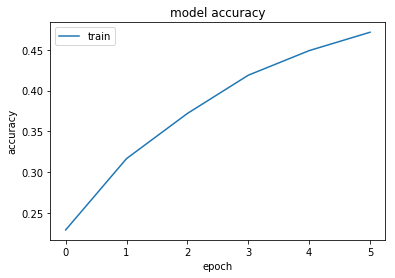

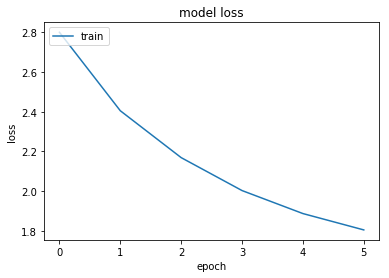

In [25]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
#x = [1,2,3,4,5]
#plt.xlim(1,5)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

From the above graphs we can tell that the model can be trained further more but due to GPU access restrictions in my floydhub account i had to restrain myself to using 6 epochs at max and using a higher batch size of 1000. A smaller batch size would have made our model better and efficent.   

### Methodology

In [37]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 40, 512)           1052672   
_________________________________________________________________
dropout_3 (Dropout)          (None, 40, 512)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 48)                24624     
Total params: 3,176,496
Trainable params: 3,176,496
Non-trainable params: 0
_________________________________________________________________
None


The model.summary() function indicates the layers in the neural network used and gives a brief summary of the network which is shown above.  

For attaining the results that have shown in this project, i initially struggled getting an optimum batch_size since using the sizes of 64/124/256 took huge amounts of time to train and couldn't complete the whole training process due to restrictions on the trial account of floydhub where i couldn't train for more than an hour continuously. The losses were seemingly getting lower but couldn't go ahead with it. So after a lot of trial and error method, i found 1000 to be the optimum batch size under the circumstances of the restrictions. The model can be hugely improed with lowering the batch_sizes and along with having a good GPU to compute.

### Text Generation

Text Generation Now, after running several epoches, we can load a trained model to see how the network generates texts. I had here a saved mode weight_saving_at_003and 1.8215.hdf5 . This model is saved after 4 epoches and the loss was 1.8215. Let see how it generates texts.

In [20]:
'''load the trained weights'''
weights = "weight_saving_at_4_and_ 1.8872.hdf5"
#weights = "weight_saving_at_003_and_ 1.8215.hdf5"
model.load_weights(weights)
model.compile(loss='categorical_crossentropy', optimizer='adam')
start = np.random.randint(0, len(X)-1)
pattern = X_[start]
print (''.join([indices_char[value] for value in pattern]))
# generate characters
for i in range(150):
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(nb_chars)
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = indices_char[index]
    seq_in = [indices_char[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
print ("\nEnd.")

re thou hangest!’

and the head answered
 to the woung was to the wood and said: ‘i will soon toon the wound be a gord to the wood and said, ‘i will soon to the wound be a gord to the wood an
End.


### Comparison with the benchmark results

The benchmark model that i have used is the Udacity's model for generating tv scripts from the deep learning nanodegree. I trained that particular model for 15 epochs with a batch_size of 500. The training loss i obtained was 1.8664 which is higher than the loss i had in this project. Also a very keen point to be noted is to see that my model had only 5 epoch with a higher batch size whicch shows that the benchmark result has been crossed by my model and can further be improved like stated before. I will upload the __ benchmark model__ too on github for the review which will make it easier to compare the models.  

### Conclusion:

Now that we have seen the results can be really impressive with the RNN’s, especially with the LSTM's tweak. So after every epoch is completed, the checkpoint file which holds the weights at that particular instant will be saved in to the repository. Using every file , we see an improvement in the prediction of the words. initially the word spaces In the first checkpoint iteration we see that the network just learns the word spaces and then later on it tries to generate sentences with vague virtuoso and then in the next iteration it learns some most used words liker the he , she, its etc.. and now more english like text appears… I have used the checkpoint file from the 5 epoch and these weights are used. and if it is trained for a longer duration with lesser batch size it will be able to generate The punctuations, quotations, names etc in a very seemeingly natural way... So basically the model first discovers the general word space and then starts to rapidly learn the actual words. And if trained longer , the longer words can be generated too along with the theme of the training set. But we need enormous amount of data and very good computational efficiency to achieve that.

Also i used another small dataset as reddit dataset was too huge for the model and an epoch took more than an hour. So used a smaller dataset which convincingly gave out really good results.


From the model accuracy and losses plotted above, the accuracy of the model is increasing fairly higher and the losses too are going down with every iteration. Though the results could have been far better with a proper GPU compute and storage availability for the network.  